#### We first import the required packages pandas, seaborn, numpy, sklearn, statsmodel to run the model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

#### Having imported our packages we then create a dataframe containing the content of the salary.csv .

In [2]:
data = pd.read_csv('CSV/salary.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


####  After import our CSV we notice that one salary value is missing from the dataframe hence it has 513 records instead of the 514. We chose to drop the one row believing that one record could not be significant to cause a change as our dataframe is large enough that the one record isn't as great of information loss. An alternative method was to give the median amount to the one salary but that could change the outcome as we seek more information that is precise and not a median.

In [4]:
data = data.dropna()
data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [5]:
data.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


### We then draw up a null hypothesis that all the columns on here are not good predictors. 

In [6]:
data.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


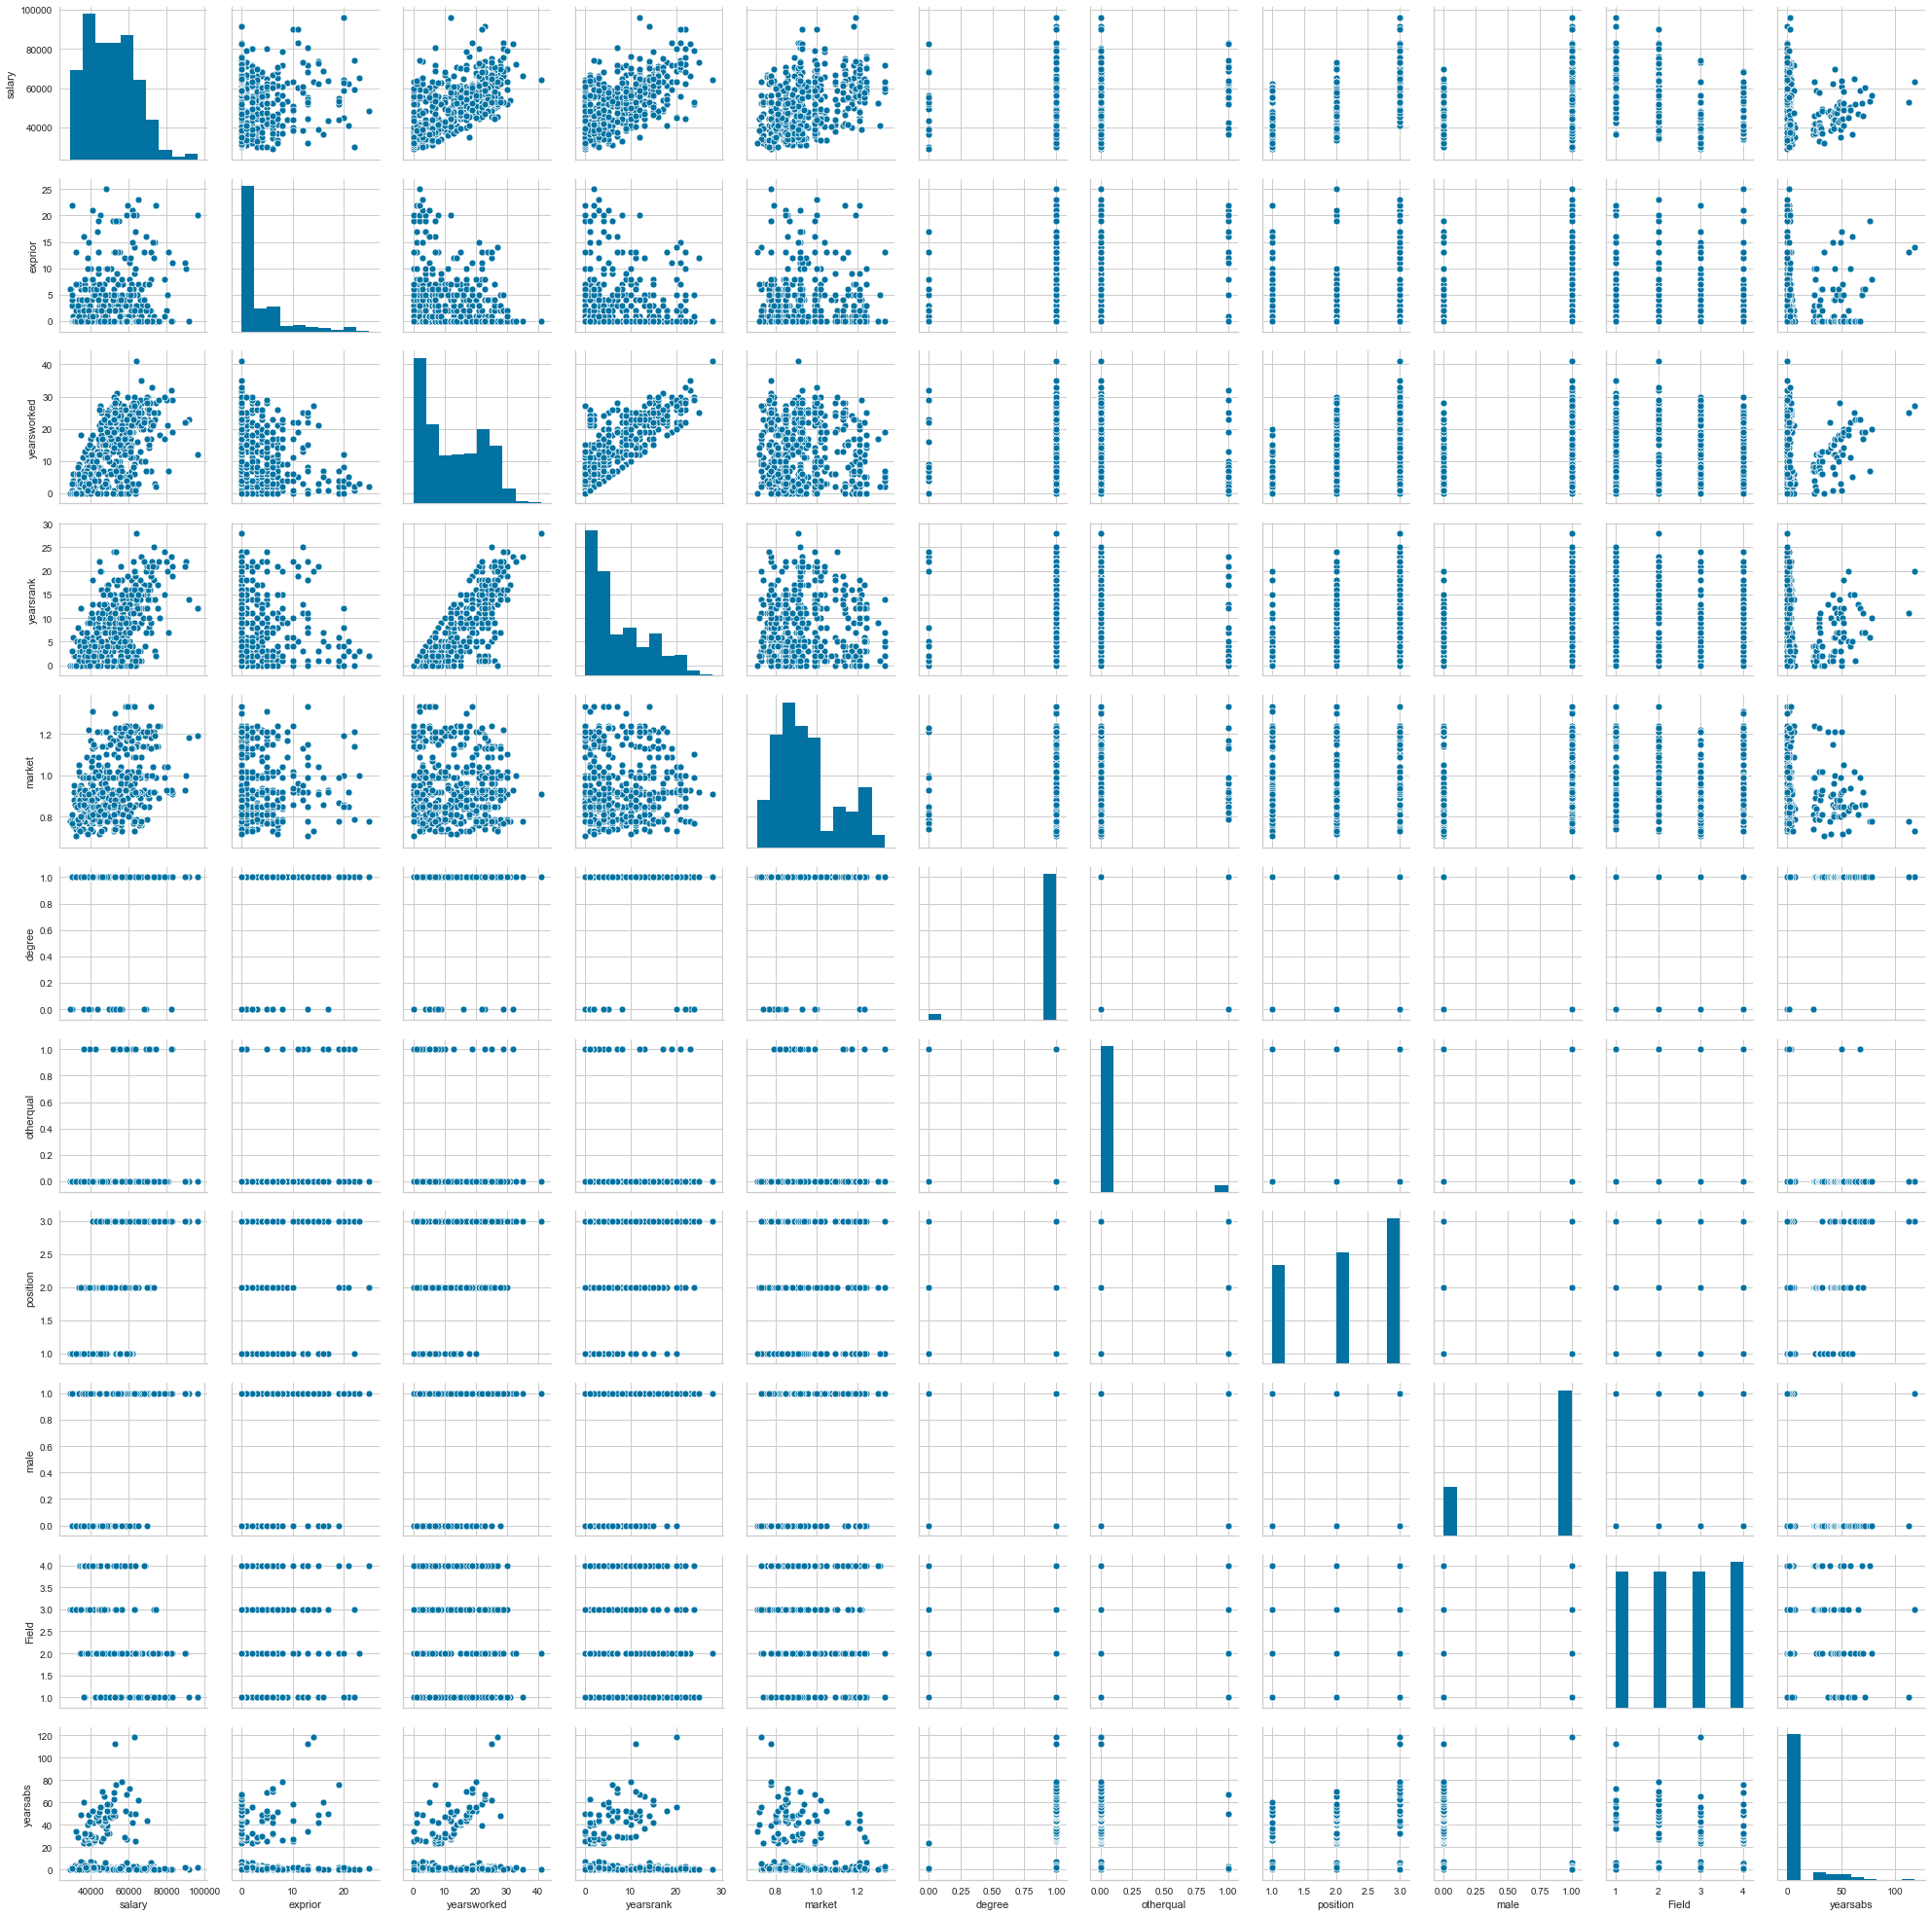

In [28]:
sns.pairplot(data)

#### From the pair plot we start to evaluate the data visualizations in scatter nd bar graphs to better see the relationship between each of the potential predictors. We can see that the Field, Male(gender column represented by 1 and 0s), position, other equal and degree are not continuous values and to continue to use such information for predicting is useless as the data will not be well predicted. Our null hypothesis as of right now is not still true as the rest of the columns are proving to be continuous data but that factor alone does not make a great predictor.

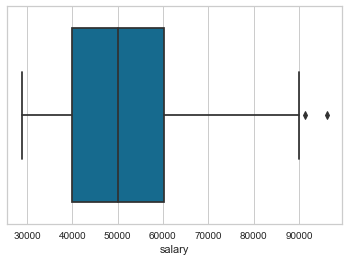

In [29]:
sns.boxplot(x=data["salary"])

#### We plot the distribution of the salary to see the range win which we have our salary and see that majority of the salary lies from around the 35 000 to the 60 000 range. The boxplot shows the 2 outliers that may skew. Not wanting to lose most of my data by dropping I decide to keep the 2 outliers and want to see the effect some predictors may have taken the outliers and test the relationship 

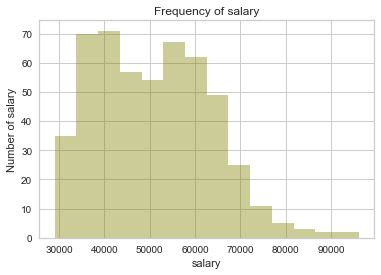

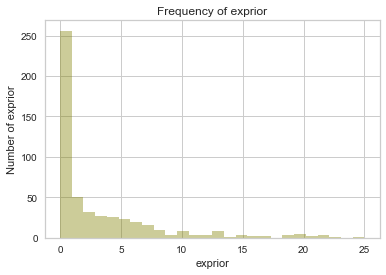

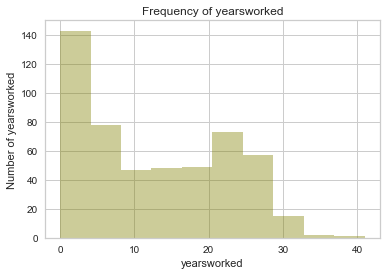

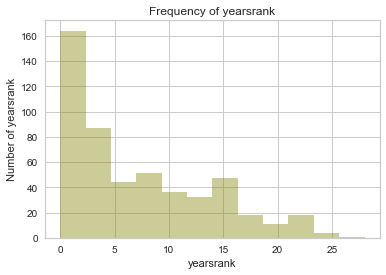

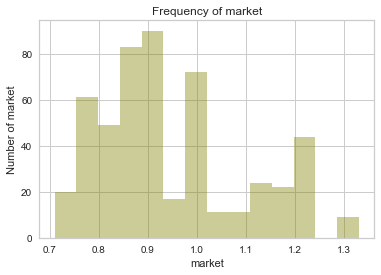

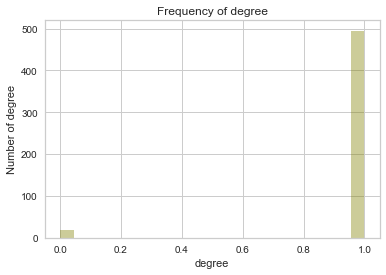

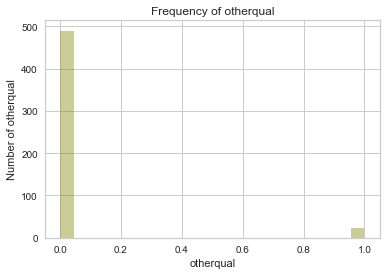

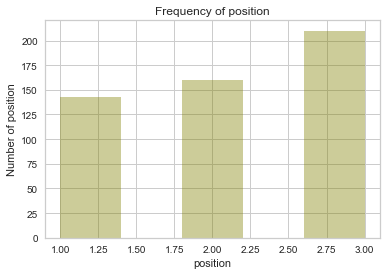

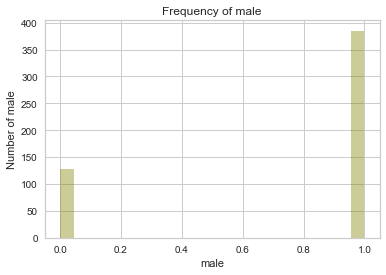

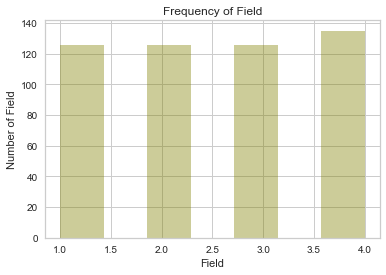

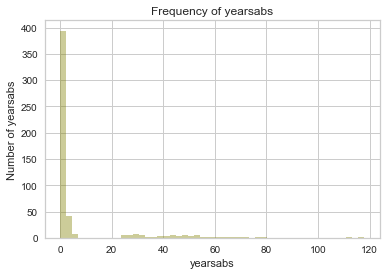

In [30]:
for i in data.columns:
    sns.distplot(data[i],  kde=False,color='olive')
    plt.xlabel(f'{i}')
    plt.ylabel(f'Number of {i}')
    plt.title(f'Frequency of {i}')
    plt.show()

#### We then visiualized the distribution of all the columns to see the variance of the data

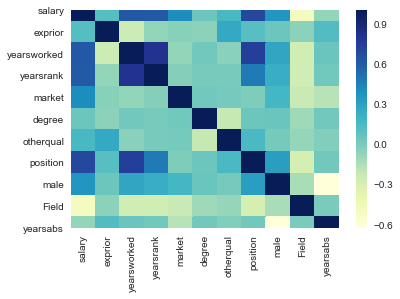

In [7]:
ax = sns.heatmap(data.corr(),cmap="YlGnBu")

In [31]:
data.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


#### We then run a color map to look into the correlation of the various columns to the salary . And since we working with the MLR we can then take the Position(although categorical) 0.70 , yearsworked 0.62, and yearsrank  0.61with them having a high correlation with salary .  And choose these as the features we will be using to model . We would use field but Field has a negative correlation to the salary .

In [33]:
pearson_corr = stats.pearsonr(data['yearsworked'], data['salary'])
print(pearson_corr)
pearson_corr = stats.pearsonr(data['yearsrank'], data['salary'])
print(pearson_corr)
pearson_corr = stats.pearsonr(data['position'], data['salary'])
print(pearson_corr)

(0.6235888657598048, 1.2873351342916404e-56)
(0.6107063176375227, 9.307173080331551e-54)
(0.7021217379212221, 2.164001495311446e-77)


#### We can see by the small P values that they are statistically significantly 

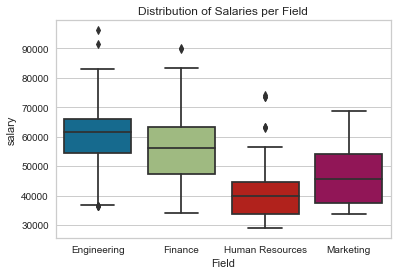

In [8]:
ax = sns.boxplot(data.Field,data.salary)
ax.set_xticklabels(['Engineering', 'Finance','Human Resources','Marketing'])
plt.title('Distribution of Salaries per Field')
plt.show()

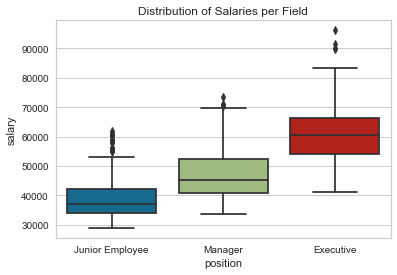

In [34]:
ax = sns.boxplot(data.position,data.salary)
ax.set_xticklabels(['Junior Employee', 'Manager','Executive'])
plt.title('Distribution of Salaries per Position')
plt.show()

#### We then plot the relationship of the salary in boxplot to view the spread across the different Position , then we notice the obvious that Junior Employees make less than Executives followed by the Managers .  Seen by the means being in the middle of the boxplot.

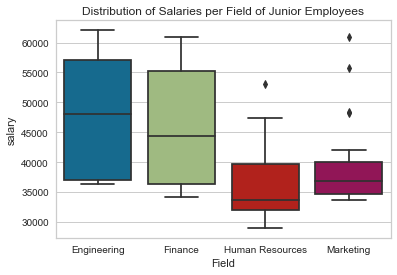

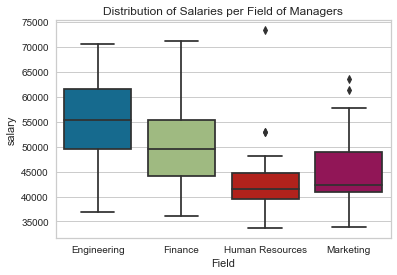

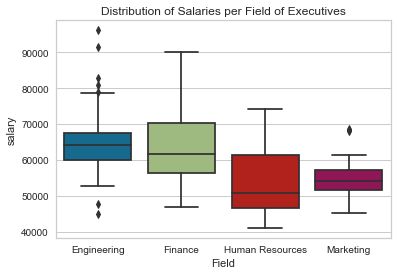

In [9]:
for i in range(1,4):
    position_df = data[data['position']==i]
    ax = sns.boxplot(position_df.Field,position_df.salary)
    ax.set_xticklabels(['Engineering', 'Finance','Human Resources','Marketing'])
    if i == 1:
        plt.title('Distribution of Salaries per Field of Junior Employees')
    elif i == 2:
        plt.title('Distribution of Salaries per Field of Managers')
    else:
        plt.title('Distribution of Salaries per Field of Executives')
    plt.show()

#### We then notice that engineers make more money in the various Positions . Followed by Finance and HR and Marketing . We also notice that majority of the Engineers are junior  employees , as that means growth in the company may be less . HR has way more Executives than all the other fields . 

In [27]:
x = data[['yearsworked','yearsrank','position']]
y = data['salary']

#### We then create a dataframe with Yearwworked,Yearsranked,Position as the  columns as we have found our predictor which is the x the independent variable for the model. And for the y  variable the dependent we use salary as the series for its what we are trying to predict.

#### As we remember the regresstion model y = mx+c


In [11]:
dummies = pd.get_dummies(data['position'])
x = pd.concat([x,dummies],axis=1)

#### Since Position is categorical data we wanted to it to be split into dummy variables and make it continuous.

In [12]:
x.rename(columns={1: "Junior Employee", 2: "Manager", 3: "Executive"},inplace=True)
x = x.drop(['position','Junior Employee'], axis=1)

In [13]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state = 10) 

#### We also split our data into a test set and training set. With the training set going to train our model to know about possible predictors using the 80/20 per cent split. The remaining 20 per cent is for shock to the model as its new information that will be predicted and see if our model can predict and test that yearsworked is thee predictor that has great significance in influencing salary increase or decrease 

In [14]:
regression = LinearRegression().fit(x_train, y_train)
simple_regression = LinearRegression().fit(x_train[['yearsworked']], y_train)
predict_multi = regression.predict(x_test)
predict_simple = simple_regression.predict(x_test[['yearsworked']])

In [15]:
print('R2: ', regression.score(x_train,y_train))
print('R2: ', simple_regression.score(x_train[['yearsworked']],y_train))

R2:  0.6608316655882909
R2:  0.4468535652534289


In [16]:
print('TEST RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, regression.predict(x_test))))
print('TRAINING RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_train, regression.predict(x_train))))

TEST RMSE: 9769.497619601643
TRAINING RMSE: 7244.9140565258695


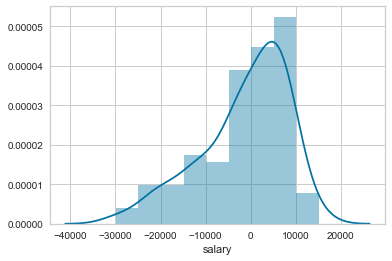

In [71]:
sns.distplot(predict_multi - y_test)

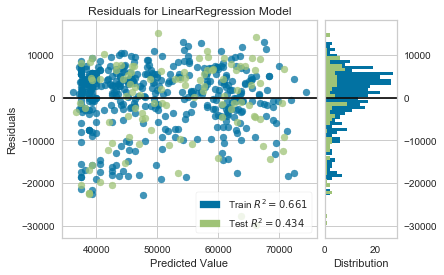

In [18]:
visualizer = ResidualsPlot(regression)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.show()

#### WE can then show our training and test Rsquared values . 0.66 for the training , and 0.43 for test showing a significant drop but a 66percent accuracy. Whilst looking at the residual plot , we see that most of our data is relavively close to 0. With higher shoulders close to 0 and 10 000. In terms of the trainign data. 

# Using stats.models to use the .summary()

In [19]:
x_train = np.append(arr = np.ones((len(x_train),1)).astype(int), values =x_train , axis = 1)

#### Adding a constant for the stats model to be exactly like the sklearn model as the sklearn add the constant autopmatically

In [37]:
x_opt = x_train[:, [0, 1, 2, 3,4]]
regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()

In [38]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     197.3
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           1.09e-93
Time:                        11:08:37   Log-Likelihood:                -4225.9
No. Observations:                 410   AIC:                             8462.
Df Residuals:                     405   BIC:                             8482.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.752e+04    679.082     55.247      0.000    3.62e+04    3.89e+04
x1          -419.7963     96.191     -4.364      0.000    -608.892    -230.701
x2          1042.3652    106.198      9.815      0.000     833.597    1251.134
x3          7668.5301   1078.794      7.108      0.000    5547.794    9789.266
x4          2.128e+04   1452.238     14.653      0.000    1.84e+04    2.41e+04
==============================================================================
Omnibus:                       60.243   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.069
Skew:                           1.041   Prob(JB):                     9.16e-19
Kurtosis:                       3.728   Cond. No.                         84.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We can then see that the increase of these will results in an increase in the salary .
 - constant 3.752e+04,
 - yearsworked -419.7963, 
 - yearsrank 1042.3652, 
 - Manager 7668.5301, 
 - Executive 2.128e+04,
 
    

In [39]:
# predict = regressor_OLS.predict(x_opt)
# x_test = np.append(arr = np.ones((len(x_test),1)).astype(int), values =x_test , axis = 1)
# #predict_x_test =  regressor_OLS.predict(x_test)
# x_test.shape

In [40]:
# predict_x_test =  regressor_OLS.predict(x_test)


In [41]:
# fitted_values = sm.regression.linear_model.RegressionResults.fittedvalues(regressor_OLS)
# sns.residplot(fitted_values,predict,lowess=True)
# plt.xlabel('Salaries')
# plt.title('Residual Plot of Actual Salary vs Predicted Salary')